### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Read the CSV file 

In [2]:
bank_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

### Get a peek of the first 5 rows to get an idea of the data

In [4]:
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Find the shape of the Dataframe

In [4]:
bank_data.shape

(5000, 14)

#### There are 5000 rows and 14 columns

### Look into 5 point summary using describe function

In [5]:
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Dropping unwanted dimensions
### Since the column ID and ZIP code is of no use we can drop those columns

In [6]:
bank_data.drop(['ID','ZIP Code'] ,axis = 1,inplace=True)

### Check for null values in the dataset

In [7]:
bank_data.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### There is no null values present

### Check the data types of the columns in the dataset

In [8]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


### Below are the column details present

1. Age - Continous values
2. Experience - Continous values
3. Income - Continous values
4. Family - Continous/Categorical values (Primarily Categorical value but any number can occur)
5. CCAvg - Continous values
6. Education - Categorical Values
7. Mortgage - Continous values
8. Personal Loan - Binary Values
9. Securities Amount - Binary Values
10. CD Account - Binary Values
11. Online - Binary Values
12. CreditCard - Binary Values

In [9]:
bank_data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


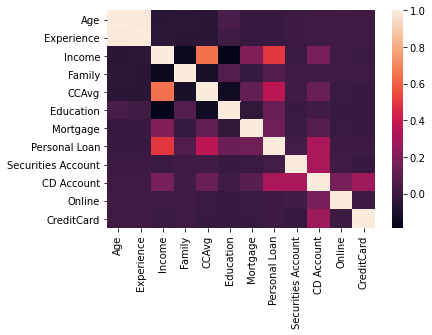

In [10]:
sns.heatmap(bank_data.corr())

#### From data Age and Experience are strongly correlated and there is no other correlations

### Find the distribution of the continous variables

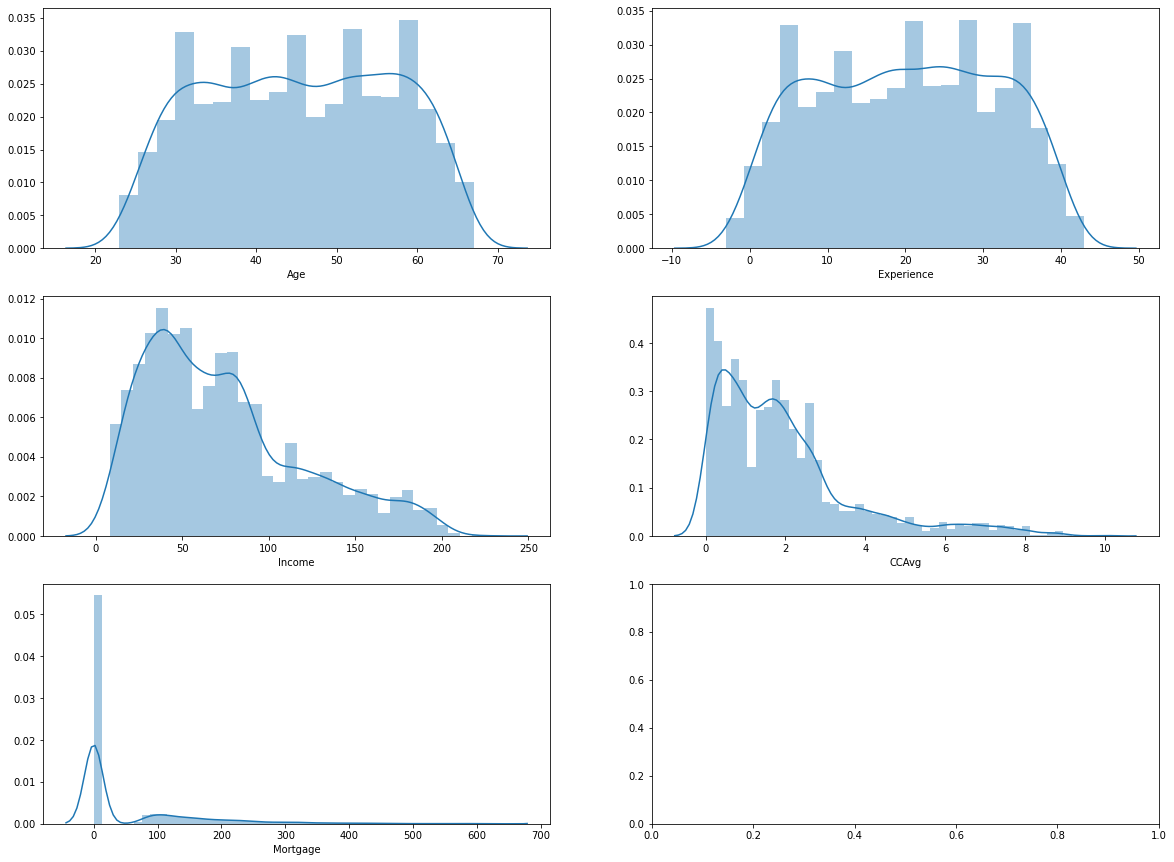

In [11]:
fig, a = plt.subplots(3,2,figsize=(20,15))
sns.distplot(bank_data['Age'] , ax=a[0,0])
sns.distplot(bank_data['Experience'] , ax=a[0,1])
sns.distplot(bank_data['Income'] , ax=a[1,0])
sns.distplot(bank_data['CCAvg'] , ax=a[1,1])
sns.distplot(bank_data['Mortgage'] , ax=a[2,0])

#### Age and Experience seems to have same distribution
#### Income and CCAvg seems to be left skewed
#### Mortgage value has many 0 values

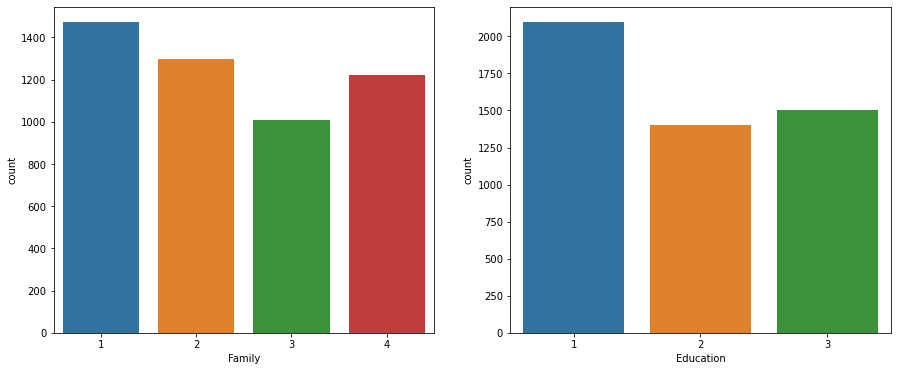

In [12]:
fig, a = plt.subplots(1,2,figsize=(15,6))
sns.countplot(bank_data['Family'] , ax=a[0])
sns.countplot(bank_data['Education'], ax=a[1])

### Checking the occurences of the binary value columns

In [13]:
bank_data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

#### Personal Loan was accepted only by 9.6% of the people

In [14]:
bank_data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

#### 10.4% Customer had Securities Account

In [15]:
bank_data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

#### 6.0% of Customer had CD Account

In [16]:
bank_data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

#### 40% of People use Internet banking

In [17]:
bank_data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

#### 29% of People used Credit Card issued by Thera bank

Text(0.5, 1.0, 'CreditCard')

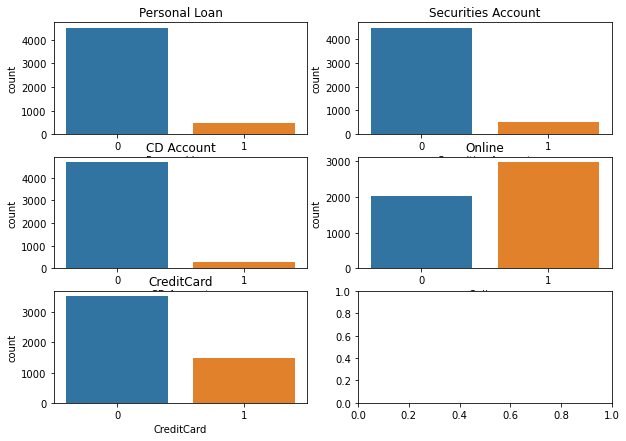

In [18]:
fig , a = plt.subplots(3,2,figsize=(10,7))

sns.countplot(bank_data['Personal Loan'] , ax=a[0,0])
a[0, 0].set_title('Personal Loan')
sns.countplot(bank_data['Securities Account'], ax=a[0,1])
a[0, 1].set_title('Securities Account')
sns.countplot(bank_data['CD Account'], ax=a[1,0])
a[1, 0].set_title('CD Account')
sns.countplot(bank_data['Online'], ax=a[1,1])
a[1, 1].set_title('Online')
sns.countplot(bank_data['CreditCard'] , ax=a[2,0])
a[2, 0].set_title('CreditCard')

### Plot for two columns to explore data

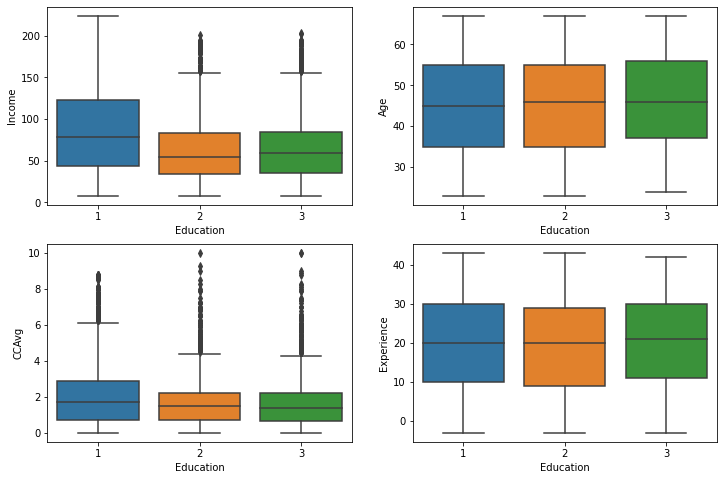

In [19]:
fig, a = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(bank_data['Education'] ,bank_data['Income'] , ax=a[0,0])
sns.boxplot(bank_data['Education'] ,bank_data['Age'] , ax=a[0,1])
sns.boxplot(bank_data['Education'] ,bank_data['CCAvg'] , ax=a[1,0])
sns.boxplot(bank_data['Education'] ,bank_data['Experience'] , ax=a[1,1])

#### From the Above graph we find that people with less education are surprisingly earning more than the ones highly educated

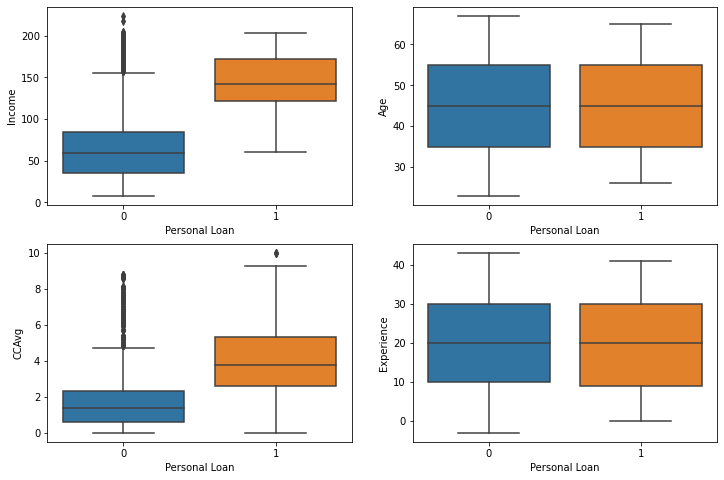

In [20]:
fig, a = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(bank_data['Personal Loan'] ,bank_data['Income'] , ax=a[0,0])
sns.boxplot(bank_data['Personal Loan'] ,bank_data['Age'] , ax=a[0,1])
sns.boxplot(bank_data['Personal Loan'] ,bank_data['CCAvg'] , ax=a[1,0])
sns.boxplot(bank_data['Personal Loan'] ,bank_data['Experience'] , ax=a[1,1])

#### People with higher income seems to accept personal loan (Reason may be because they can repay the loan easily)
#### Also people accepting personal loans spends more on credit cards (They seem to spend money beforehand)

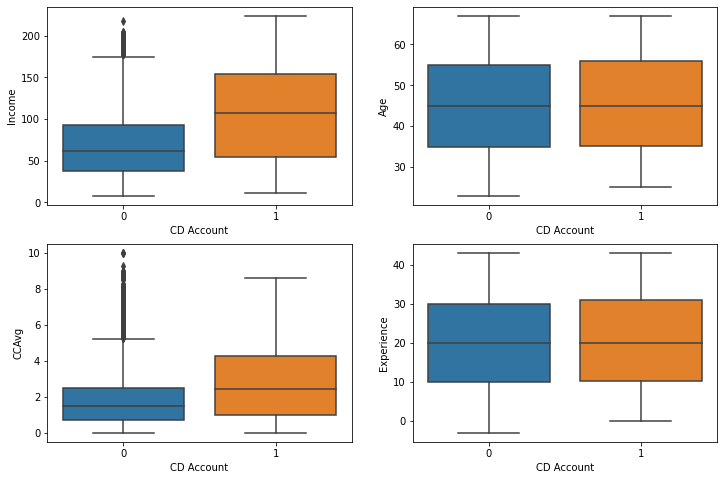

In [21]:
fig, a = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(bank_data['CD Account'] ,bank_data['Income'] , ax=a[0,0])
sns.boxplot(bank_data['CD Account'] ,bank_data['Age'] , ax=a[0,1])
sns.boxplot(bank_data['CD Account'] ,bank_data['CCAvg'] , ax=a[1,0])
sns.boxplot(bank_data['CD Account'] ,bank_data['Experience'] , ax=a[1,1])

#### Customer with higher CD Account seems to have more income

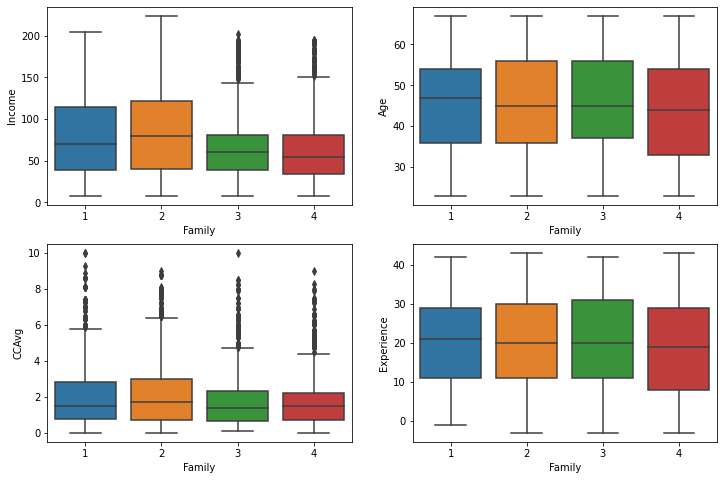

In [22]:
fig, a = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(bank_data['Family'] ,bank_data['Income'] , ax=a[0,0])
sns.boxplot(bank_data['Family'] ,bank_data['Age'] , ax=a[0,1])
sns.boxplot(bank_data['Family'] ,bank_data['CCAvg'] , ax=a[1,0])
sns.boxplot(bank_data['Family'] ,bank_data['Experience'] , ax=a[1,1])

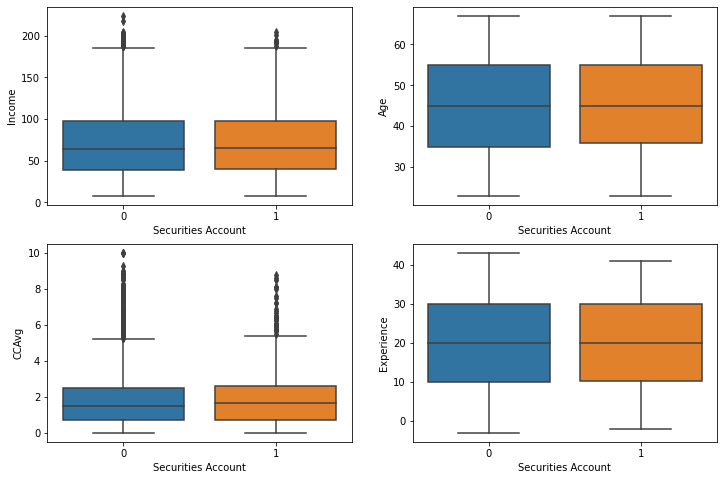

In [23]:
fig, a = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(bank_data['Securities Account'] ,bank_data['Income'] , ax=a[0,0])
sns.boxplot(bank_data['Securities Account'] ,bank_data['Age'] , ax=a[0,1])
sns.boxplot(bank_data['Securities Account'] ,bank_data['CCAvg'] , ax=a[1,0])
sns.boxplot(bank_data['Securities Account'] ,bank_data['Experience'] , ax=a[1,1])

#### No matter what the income,age,experience is people tend to have securities account

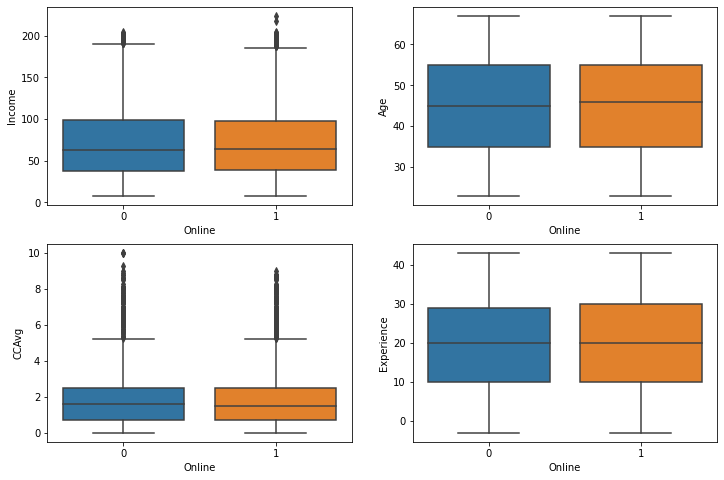

In [24]:
fig, a = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(bank_data['Online'] ,bank_data['Income'] , ax=a[0,0])
sns.boxplot(bank_data['Online'] ,bank_data['Age'] , ax=a[0,1])
sns.boxplot(bank_data['Online'] ,bank_data['CCAvg'] , ax=a[1,0])
sns.boxplot(bank_data['Online'] ,bank_data['Experience'] , ax=a[1,1])

#### No matter what the income,age,experience is people tend to use online payment

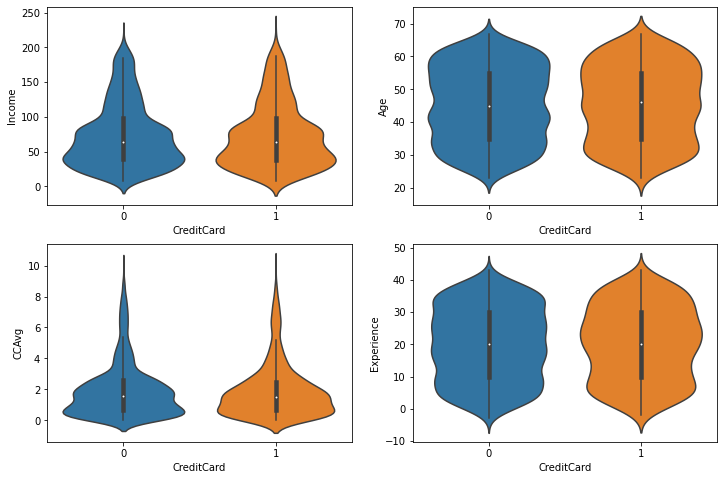

In [25]:
fig, a = plt.subplots(2,2,figsize=(12,8))
sns.violinplot(bank_data['CreditCard'] ,bank_data['Income'] , ax=a[0,0])
sns.violinplot(bank_data['CreditCard'] ,bank_data['Age'] , ax=a[0,1])
sns.violinplot(bank_data['CreditCard'] ,bank_data['CCAvg'] , ax=a[1,0])
sns.violinplot(bank_data['CreditCard'] ,bank_data['Experience'] , ax=a[1,1])

#### No matter what the income,age,experience is people tend to use credit card the same amount. 

### Pairplot

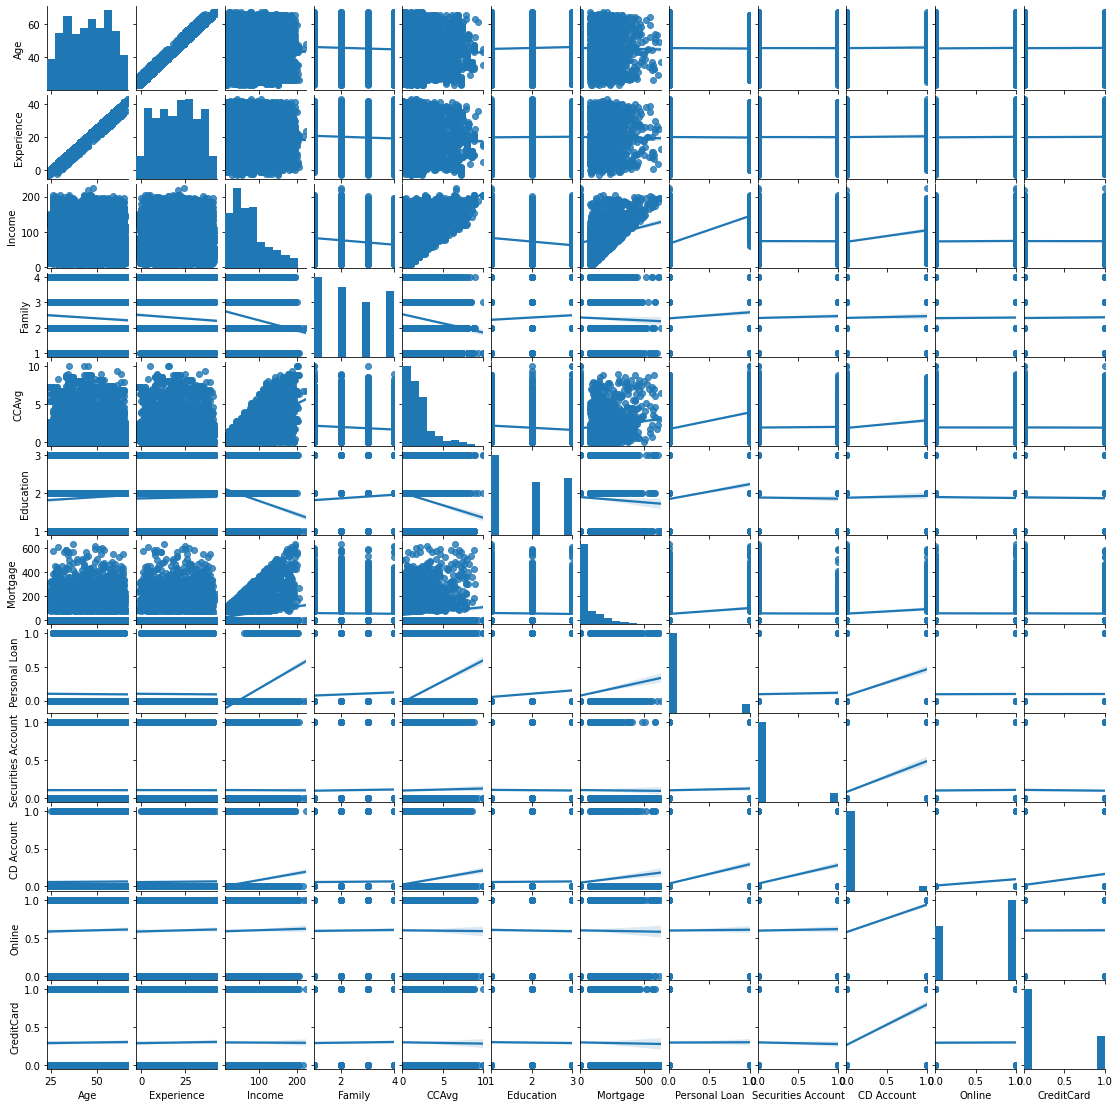

In [26]:
g=sns.pairplot(bank_data, kind='reg')
g.fig.set_size_inches(15,15)

#### There is no relation between age and income
#### There is no relation between experience and income

### Compare how personal loan varies with other categorical variables for income

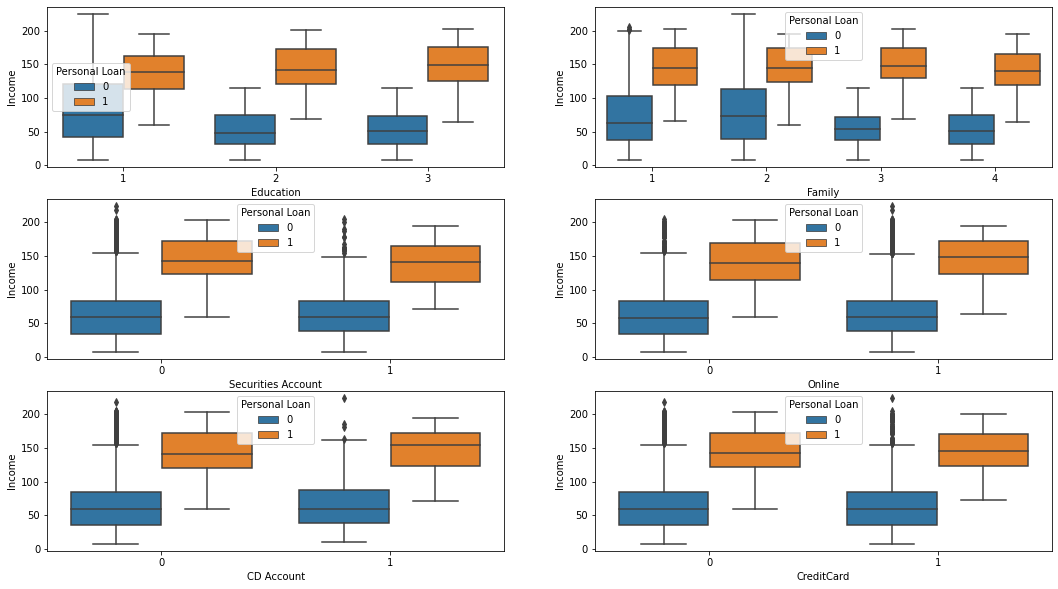

In [27]:
fig , a = plt.subplots(3,2,figsize=(18,10))
sns.boxplot(bank_data['Education'] , bank_data['Income'] , hue=bank_data['Personal Loan'] , ax=a[0,0])
sns.boxplot(bank_data['Family'] , bank_data['Income'] , hue=bank_data['Personal Loan'] , ax=a[0,1])
sns.boxplot(bank_data['Securities Account'] , bank_data['Income'] , hue=bank_data['Personal Loan'],  ax=a[1,0])
sns.boxplot(bank_data['Online'] , bank_data['Income'] , hue=bank_data['Personal Loan'],  ax=a[1,1])
sns.boxplot(bank_data['CD Account'] , bank_data['Income'] , hue=bank_data['Personal Loan'],  ax=a[2,0])
sns.boxplot(bank_data['CreditCard'] , bank_data['Income'] , hue=bank_data['Personal Loan'],  ax=a[2,1])


#### Income of customer with undergraduate education with and without personal loan is significantly less different from that of other educational qualification.
### The above statement implies that people with less educational qualification with more income tend to not choose personal loan more

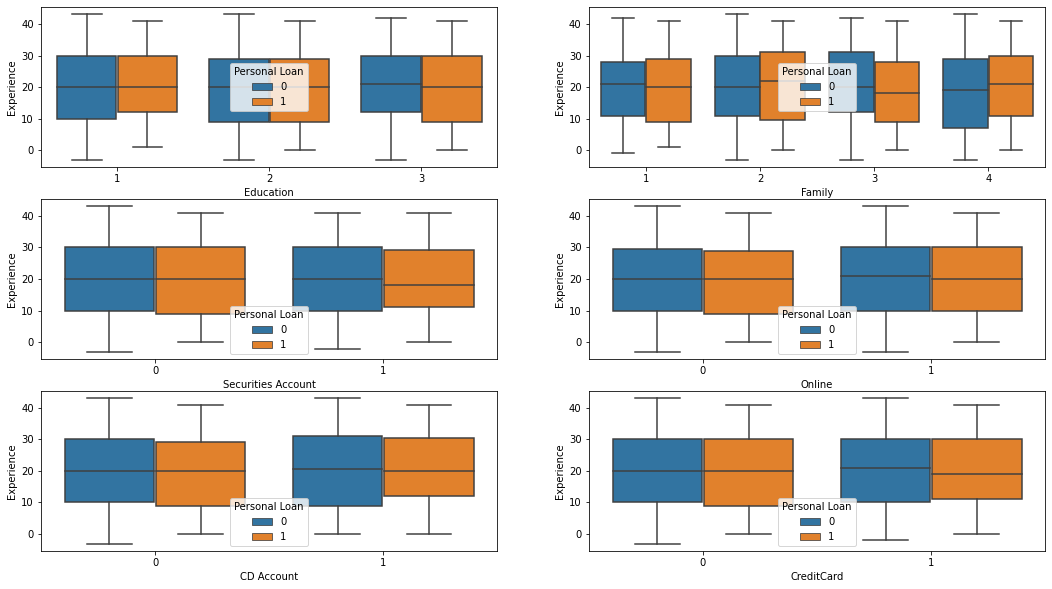

In [28]:
fig , a = plt.subplots(3,2,figsize=(18,10))
sns.boxplot(bank_data['Education'] , bank_data['Experience'] , hue=bank_data['Personal Loan'] , ax=a[0,0])
sns.boxplot(bank_data['Family'] , bank_data['Experience'] , hue=bank_data['Personal Loan'] , ax=a[0,1])
sns.boxplot(bank_data['Securities Account'] , bank_data['Experience'] , hue=bank_data['Personal Loan'],  ax=a[1,0])
sns.boxplot(bank_data['Online'] , bank_data['Experience'] , hue=bank_data['Personal Loan'],  ax=a[1,1])
sns.boxplot(bank_data['CD Account'] , bank_data['Experience'] , hue=bank_data['Personal Loan'],  ax=a[2,0])
sns.boxplot(bank_data['CreditCard'] , bank_data['Experience'] , hue=bank_data['Personal Loan'],  ax=a[2,1])


#### Experience does not have significant difference between customer who accept personal loan and who does not accept

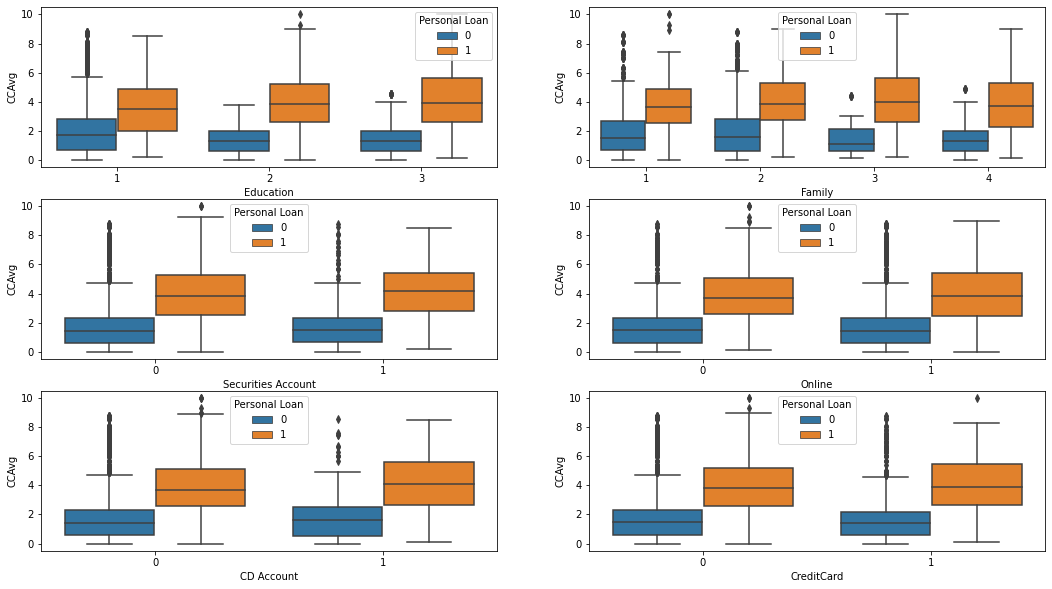

In [29]:
fig , a = plt.subplots(3,2,figsize=(18,10))
sns.boxplot(bank_data['Education'] , bank_data['CCAvg'] , hue=bank_data['Personal Loan'] , ax=a[0,0])
sns.boxplot(bank_data['Family'] , bank_data['CCAvg'] , hue=bank_data['Personal Loan'] , ax=a[0,1])
sns.boxplot(bank_data['Securities Account'] , bank_data['CCAvg'] , hue=bank_data['Personal Loan'],  ax=a[1,0])
sns.boxplot(bank_data['Online'] , bank_data['CCAvg'] , hue=bank_data['Personal Loan'],  ax=a[1,1])
sns.boxplot(bank_data['CD Account'] , bank_data['CCAvg'] , hue=bank_data['Personal Loan'],  ax=a[2,0])
sns.boxplot(bank_data['CreditCard'] , bank_data['CCAvg'] , hue=bank_data['Personal Loan'],  ax=a[2,1])


#### Not much of a noticable diffference

#### Let's look into how personal loan varies with continous variables

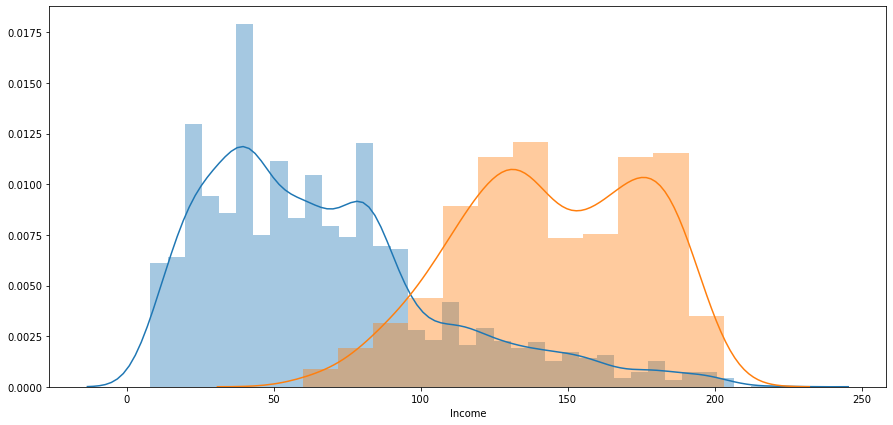

In [30]:
plt.figure(figsize=(15,7))
sns.distplot( bank_data[bank_data['Personal Loan'] == 0]['Income'] )
sns.distplot( bank_data[bank_data['Personal Loan'] == 1]['Income'] );

#### Customer with more income has accepted personal loan more

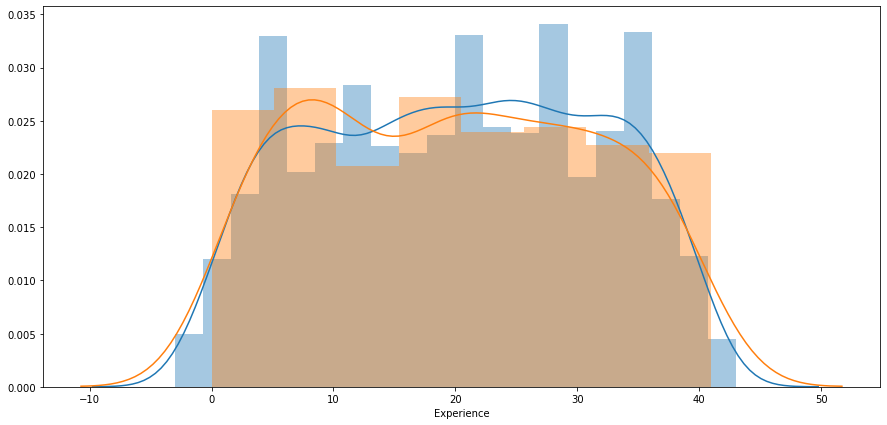

In [31]:
plt.figure(figsize=(15,7))
sns.distplot( bank_data[bank_data['Personal Loan'] == 0]['Experience'] )
sns.distplot( bank_data[bank_data['Personal Loan'] == 1]['Experience'] );

#### There is no much of a difference in experience with customer accepting personal loans

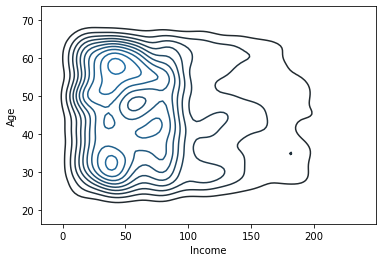

In [32]:
sns.kdeplot(bank_data['Income'], bank_data['Age'])

#### Income is spread across ages and many people tend to fall in the income range of 0 - 100 and a few above 100 for all age groups

### Since Age and Experience is directly correlated, we can omit one feature

In [33]:
x = bank_data.drop(['Personal Loan' , 'Experience'] , axis = 1)
y = bank_data['Personal Loan']

### Split train and test data

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [35]:
y_train.shape

(3500,)

##### Hence test output has only 1 column

In [36]:
print('INPUT')
print('Training input set has', X_train.shape[0],'rows and',X_train.shape[1],'columns')
print('Testing input set has', X_test.shape[0],'rows and',X_test.shape[1],'columns')
print('Training input set has',X_train.shape[0]* 100/x.shape[0],'% records and Testing input set has',X_test.shape[0]* 100/x.shape[0],'% records')
print('OUTPUT')
print('Training output set has', y_train.shape[0],'rows and 1 column')
print('Testing output set has', y_test.shape[0],'rows and 1 column')
print('Training output set has',y_train.shape[0]* 100/y.shape[0],'% records and Testing output set has',y_test.shape[0]* 100/y.shape[0],'% records')



INPUT
Training input set has 3500 rows and 10 columns
Testing input set has 1500 rows and 10 columns
Training input set has 70.0 % records and Testing input set has 30.0 % records
OUTPUT
Training output set has 3500 rows and 1 column
Testing output set has 1500 rows and 1 column
Training output set has 70.0 % records and Testing output set has 30.0 % records


### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(X_train,y_train)


LogisticRegression(solver='liblinear')

In [38]:
model_score = model.score(X_train, y_train)
print('Model score for Training data is',round(model_score*100,4))

Model score for Training data is 94.9143


In [39]:
model_score = model.score(X_test, y_test)
print('Model score for Testing data is',round(model_score*100,4))

Model score for Testing data is 94.2667


#### Model score for Traning and Testing data is almost similar

#### Predicting Y values

In [40]:
y_predict = model.predict(X_test)

In [41]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
print(cm)

[[  76   73]
 [  13 1338]]


### After Preprocessing the Data

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(X_train_scaled,y_train)


LogisticRegression(solver='liblinear')

In [45]:
model_score_scaled = model.score(X_train_scaled, y_train)
print('Model score for Training data is',round(model_score_scaled*100,4))

Model score for Training data is 95.3429


In [46]:
model_score_scaled = model.score(X_test_scaled, y_test)
print('Model score for Training data is',round(model_score_scaled*100,4))

Model score for Training data is 94.8


#### After scaling the score of the model has increased a little bit

#### Predicting Y values

In [47]:
lr_y_predict_scaled = model.predict(X_test_scaled)

In [48]:
from sklearn import metrics
cm_scaled=metrics.confusion_matrix(y_test, lr_y_predict_scaled, labels=[1, 0])
print(cm_scaled)

[[  88   61]
 [  17 1334]]


Logistic Regression
Without Scaling the Score is:  94.3
Without Scaling the Confusion matrix: 
[[  76   73]
 [  13 1338]]


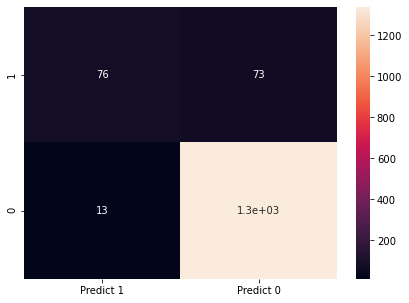

True Positives (TP): we correctly predicted that they accepted personal loan 76
True Negatives (TN): we correctly predicted that they didn't accept personal loan 1338
False Positives (FP): we incorrectly predicted that they accepted personal loan (a "Type I error") 73 Falsely predict positive Type I error
False Negatives (FN): we incorrectly predicted that they don't accept personal loan (a "Type II error") 13 Falsely predict negative Type II error
---------------------------------------------
With Scaling the Score is:  94.8
With Scaling the Confusion matrix: 
[[  88   61]
 [  17 1334]]


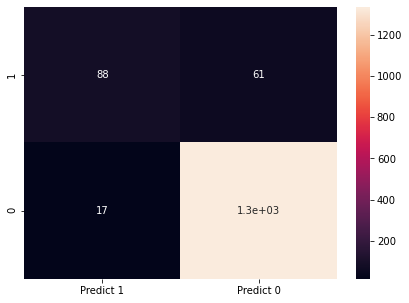

True Positives (TP): we correctly predicted that they accepted personal loan 88
True Negatives (TN): we correctly predicted that they didn't accept personal loan 1334
False Positives (FP): we incorrectly predicted that they accepted personal loan (a "Type I error") 61 Falsely predict positive Type I error
False Negatives (FN): we incorrectly predicted that they don't accept personal loan (a "Type II error") 17 Falsely predict negative Type II error


In [49]:
print('Logistic Regression')
print('Without Scaling the Score is: ',round(model_score,3)*100)
print('Without Scaling the Confusion matrix: ')
print(cm)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

plt.show()

print('True Positives (TP): we correctly predicted that they accepted personal loan 76')

print('True Negatives (TN): we correctly predicted that they didn\'t accept personal loan 1338')

print('False Positives (FP): we incorrectly predicted that they accepted personal loan (a "Type I error") 73 Falsely predict positive Type I error')

print('False Negatives (FN): we incorrectly predicted that they don\'t accept personal loan (a "Type II error") 13 Falsely predict negative Type II error')


print('---------------------------------------------')
print('With Scaling the Score is: ',round(model_score_scaled,3)*100)
print('With Scaling the Confusion matrix: ')
print(cm_scaled)
df_cm_scaled = pd.DataFrame(cm_scaled, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_scaled, annot=True)
plt.show()

print('True Positives (TP): we correctly predicted that they accepted personal loan 88')

print('True Negatives (TN): we correctly predicted that they didn\'t accept personal loan 1334')

print('False Positives (FP): we incorrectly predicted that they accepted personal loan (a "Type I error") 61 Falsely predict positive Type I error')

print('False Negatives (FN): we incorrectly predicted that they don\'t accept personal loan (a "Type II error") 17 Falsely predict negative Type II error')


# Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

model = GaussianNB()

model.fit(X_train, y_train.ravel())

GaussianNB()

### Predicting Y values

In [51]:
y_train_predict = model.predict(X_train)

In [52]:
from sklearn import metrics

model_score = metrics.accuracy_score(y_train, y_train_predict)
print('Model score for Training data is',round(model_score*100,4))

Model score for Training data is 88.9429


In [53]:
y_test_predict = model.predict(X_test)

In [54]:
from sklearn import metrics

model_score = metrics.accuracy_score(y_test, y_test_predict)
print('Model score for Testing data is',round(model_score*100,4))

Model score for Testing data is 87.4667


In [55]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])
print(cm)

[[  85   64]
 [ 124 1227]]


### Try with scaled inputs

In [56]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

model = GaussianNB()

model.fit(X_train_scaled, y_train.ravel())

GaussianNB()

In [57]:
y_train_predict_scaled = model.predict(X_train_scaled)

In [58]:
from sklearn import metrics

model_score_scaled = metrics.accuracy_score(y_train, y_train_predict_scaled)
print('Model score for Testing data is',round(model_score_scaled*100,4))

Model score for Testing data is 88.9429


In [59]:
nb_y_predict_scaled = model.predict(X_test_scaled)

In [60]:
model_score_scaled = metrics.accuracy_score(y_test, nb_y_predict_scaled)
print('Model score for Testing data is',round(model_score*100,4))

Model score for Testing data is 87.4667


### After Scaling also the Score does not seem to increase

In [61]:
from sklearn import metrics
cm_scaled=metrics.confusion_matrix(y_test, nb_y_predict_scaled, labels=[1, 0])
print(cm)

[[  85   64]
 [ 124 1227]]


Naive Bayes
Without Scaling the Score is:  87.5
Without Scaling the Confusion matrix: 
[[  85   64]
 [ 124 1227]]


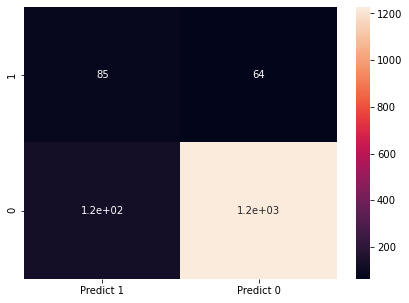

True Positives (TP): we correctly predicted that they accepted personal loan 85
True Negatives (TN): we correctly predicted that they didn't accept personal loan 1227
False Positives (FP): we incorrectly predicted that they accepted personal loan (a "Type I error") 64 Falsely predict positive Type I error
False Negatives (FN): we incorrectly predicted that they don't accept personal loan (a "Type II error") 124 Falsely predict negative Type II error
---------------------------------------------
With Scaling the Score is:  87.2
With Scaling the Confusion matrix: 
[[  84   65]
 [ 127 1224]]


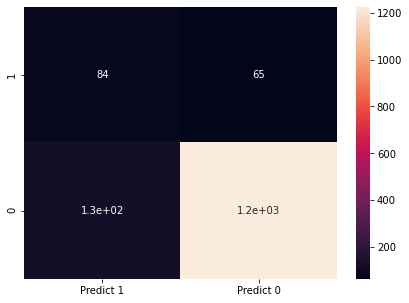

True Positives (TP): we correctly predicted that they accepted personal loan 84
True Negatives (TN): we correctly predicted that they didn't accept personal loan 1224
False Positives (FP): we incorrectly predicted that they accepted personal loan (a "Type I error") 65 Falsely predict positive Type I error
False Negatives (FN): we incorrectly predicted that they don't accept personal loan (a "Type II error") 127 Falsely predict negative Type II error


In [62]:
print('Naive Bayes')
print('Without Scaling the Score is: ',round(model_score,3)*100)
print('Without Scaling the Confusion matrix: ')
print(cm)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

plt.show()

print('True Positives (TP): we correctly predicted that they accepted personal loan 85')

print('True Negatives (TN): we correctly predicted that they didn\'t accept personal loan 1227')

print('False Positives (FP): we incorrectly predicted that they accepted personal loan (a "Type I error") 64 Falsely predict positive Type I error')

print('False Negatives (FN): we incorrectly predicted that they don\'t accept personal loan (a "Type II error") 124 Falsely predict negative Type II error')


print('---------------------------------------------')
print('With Scaling the Score is: ',round(model_score_scaled,3)*100)
print('With Scaling the Confusion matrix: ')
print(cm_scaled)
df_cm_scaled = pd.DataFrame(cm_scaled, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_scaled, annot=True)
plt.show()

print('True Positives (TP): we correctly predicted that they accepted personal loan 84')

print('True Negatives (TN): we correctly predicted that they didn\'t accept personal loan 1224')

print('False Positives (FP): we incorrectly predicted that they accepted personal loan (a "Type I error") 65 Falsely predict positive Type I error')

print('False Negatives (FN): we incorrectly predicted that they don\'t accept personal loan (a "Type II error") 127 Falsely predict negative Type II error')


# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

for i in range(3,30):
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance' )
    NNH.fit(X_train, y_train)
    y_test_predict = NNH.predict(X_test)
    model_score = NNH.score(X_test, y_test)
    print('k =' , i , model_score)

k = 3 0.9113333333333333
k = 4 0.9093333333333333
k = 5 0.9073333333333333
k = 6 0.9066666666666666
k = 7 0.9053333333333333
k = 8 0.9073333333333333
k = 9 0.908
k = 10 0.91
k = 11 0.9093333333333333
k = 12 0.9053333333333333
k = 13 0.9066666666666666
k = 14 0.9086666666666666
k = 15 0.91
k = 16 0.91
k = 17 0.9073333333333333
k = 18 0.9073333333333333
k = 19 0.9066666666666666
k = 20 0.9086666666666666
k = 21 0.906
k = 22 0.904
k = 23 0.9033333333333333
k = 24 0.9033333333333333
k = 25 0.9053333333333333
k = 26 0.9046666666666666
k = 27 0.9073333333333333
k = 28 0.9073333333333333
k = 29 0.9073333333333333


In [64]:
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
NNH.fit(X_train, y_train)
y_test_predict = NNH.predict(X_test)
model_score = NNH.score(X_test, y_test)

In [65]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])
print(cm)

[[  59   90]
 [  43 1308]]


### Try with scaled inputs

In [66]:
for i in range(3,30):
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance' )
    NNH.fit(X_train_scaled, y_train)
    y_test_predict_scaled = NNH.predict(X_test_scaled)
    model_score_scaled = NNH.score(X_test_scaled, y_test)
    print('k =' , i , model_score_scaled)

k = 3 0.9586666666666667
k = 4 0.96
k = 5 0.956
k = 6 0.958
k = 7 0.9553333333333334
k = 8 0.9566666666666667
k = 9 0.9526666666666667
k = 10 0.9533333333333334
k = 11 0.9513333333333334
k = 12 0.952
k = 13 0.952
k = 14 0.948
k = 15 0.95
k = 16 0.95
k = 17 0.9506666666666667
k = 18 0.948
k = 19 0.9493333333333334
k = 20 0.9473333333333334
k = 21 0.948
k = 22 0.9453333333333334
k = 23 0.9473333333333334
k = 24 0.9446666666666667
k = 25 0.9433333333333334
k = 26 0.942
k = 27 0.9433333333333334
k = 28 0.9433333333333334
k = 29 0.9426666666666667


In [67]:
NNH = KNeighborsClassifier(n_neighbors= 4 , weights = 'distance' )
NNH.fit(X_train_scaled, y_train)
knn_y_predict_scaled = NNH.predict(X_test_scaled)
model_score_scaled = NNH.score(X_test_scaled, y_test)

In [68]:
from sklearn import metrics
cm_scaled=metrics.confusion_matrix(y_test, knn_y_predict_scaled, labels=[1, 0])
print(cm_scaled)

[[ 100   49]
 [  11 1340]]


### Score of the model seems to be better with scaled inputs

KNN
Without Scaling the Score is:  91.10000000000001
Without Scaling the Confusion matrix: 
[[  59   90]
 [  43 1308]]


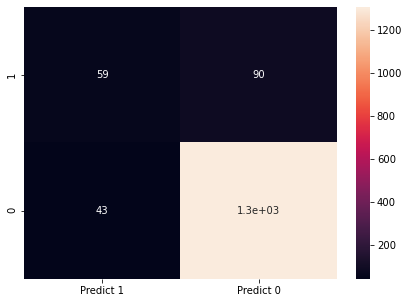

True Positives (TP): we correctly predicted that they accepted personal loan 59
True Negatives (TN): we correctly predicted that they didn't accept personal loan 1308
False Positives (FP): we incorrectly predicted that they accepted personal loan (a "Type I error") 90 Falsely predict positive Type I error
False Negatives (FN): we incorrectly predicted that they don't accept personal loan (a "Type II error") 43 Falsely predict negative Type II error
---------------------------------------------
With Scaling the Score is:  96.0
With Scaling the Confusion matrix: 
[[ 100   49]
 [  11 1340]]


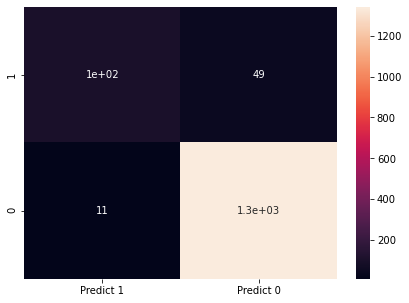

True Positives (TP): we correctly predicted that they accepted personal loan 100
True Negatives (TN): we correctly predicted that they didn't accept personal loan 1340
False Positives (FP): we incorrectly predicted that they accepted personal loan (a "Type I error") 49 Falsely predict positive Type I error
False Negatives (FN): we incorrectly predicted that they don't accept personal loan (a "Type II error") 11 Falsely predict negative Type II error


In [69]:
print('KNN')
print('Without Scaling the Score is: ',round(model_score,3)*100)
print('Without Scaling the Confusion matrix: ')
print(cm)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

plt.show()

print('True Positives (TP): we correctly predicted that they accepted personal loan 59')

print('True Negatives (TN): we correctly predicted that they didn\'t accept personal loan 1308')

print('False Positives (FP): we incorrectly predicted that they accepted personal loan (a "Type I error") 90 Falsely predict positive Type I error')

print('False Negatives (FN): we incorrectly predicted that they don\'t accept personal loan (a "Type II error") 43 Falsely predict negative Type II error')


print('---------------------------------------------')
print('With Scaling the Score is: ',round(model_score_scaled,3)*100)
print('With Scaling the Confusion matrix: ')
print(cm_scaled)
df_cm_scaled = pd.DataFrame(cm_scaled, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_scaled, annot=True)
plt.show()

print('True Positives (TP): we correctly predicted that they accepted personal loan 100')

print('True Negatives (TN): we correctly predicted that they didn\'t accept personal loan 1340')

print('False Positives (FP): we incorrectly predicted that they accepted personal loan (a "Type I error") 49 Falsely predict positive Type I error')

print('False Negatives (FN): we incorrectly predicted that they don\'t accept personal loan (a "Type II error") 11 Falsely predict negative Type II error')


# From the above 3 models we see that KNN model gives the best predicted result

1. Score of Logistic Regression is 94.8%
2. Score of Naive Bayes is 87.4%
3. Score of KNN is 96%

## KNN is performing better with K value of 4 and scaled inputs

### Classification report for Logistic Regression

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_y_predict_scaled))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.84      0.59      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



### Classification report for Naive Bayes

In [71]:
print(classification_report(y_test,nb_y_predict_scaled))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.40      0.56      0.47       149

    accuracy                           0.87      1500
   macro avg       0.67      0.73      0.70      1500
weighted avg       0.89      0.87      0.88      1500



### Classification report for KNN

In [72]:
print(classification_report(y_test,knn_y_predict_scaled))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.90      0.67      0.77       149

    accuracy                           0.96      1500
   macro avg       0.93      0.83      0.87      1500
weighted avg       0.96      0.96      0.96      1500



In [73]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds1 = roc_curve(y_test, knn_y_predict_scaled)
roc_auc1 = auc(fpr1, tpr1)
print("For KNN Area under the ROC curve : %f" % roc_auc1)

For KNN Area under the ROC curve : 0.831499


In [74]:
from sklearn.metrics import roc_curve, auc
fpr2, tpr2, thresholds2 = roc_curve(y_test, nb_y_predict_scaled)
roc_auc2 = auc(fpr2, tpr2)
print("For Naive Bayes Area under the ROC curve : %f" % roc_auc2)

For Naive Bayes Area under the ROC curve : 0.734877


In [75]:
from sklearn.metrics import roc_curve, auc
fpr3, tpr3, thresholds3 = roc_curve(y_test, lr_y_predict_scaled)
roc_auc3 = auc(fpr3, tpr3)
print("For Logistic Regression Area under the ROC curve : %f" % roc_auc3)

For Logistic Regression Area under the ROC curve : 0.789010


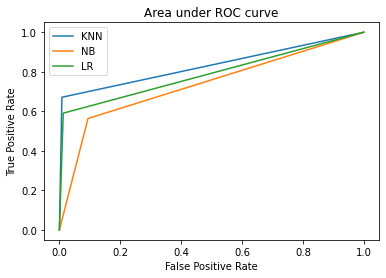

In [76]:
plt.plot(fpr1, tpr1, label='KNN')
plt.plot(fpr2, tpr2, label='NB')
plt.plot(fpr3, tpr3, label='LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area under ROC curve')
plt.legend()
plt.show()

# From the Above Classification report also KNN seems to have better scores. 
# The Area under ROC curve is also more for KNN (0.83) (Close to 1)
# Thus we conclude by saying KNN is the best model in this case